[![Fixel Algorithms](https://i.imgur.com/AqKHVZ0.png)](https://fixelalgorithms.gitlab.io/)

# Circles Decision Tree Classifier 

> Notebook by:
> - Royi Avital RoyiAvital@fixelalgorithms.com

## Revision History

| Version | Date       | User        |Content / Changes                                                   |
|---------|------------|-------------|--------------------------------------------------------------------|
| 1.0.000 | 23/03/2024 | Royi Avital | First version                                                      |

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/FixelAlgorithmsTeam/FixelCourses/blob/master/AIProgram/2024_02/0043ClassifierDecisionTree.ipynb)

In [12]:
# Import Packages

# General Tools
import numpy as np
import scipy as sp
import pandas as pd

# Machine Learning
from sklearn.datasets import make_circles, make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree


# Miscellaneous
import math
import os
from platform import python_version
import random
import timeit

# Typing
from typing import Callable, Dict, List, Optional, Set, Tuple, Union

# Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Jupyter
from IPython import get_ipython
from IPython.display import Image
from IPython.display import display
from ipywidgets import Dropdown, FloatSlider, interact, IntSlider, Layout, SelectionSlider
from ipywidgets import interact

## Notations

* <font color='red'>(**?**)</font> Question to answer interactively.
* <font color='blue'>(**!**)</font> Simple task to add code for the notebook.
* <font color='green'>(**@**)</font> Optional / Extra self practice.
* <font color='brown'>(**#**)</font> Note / Useful resource / Food for thought.

Code Notations:

```python
someVar    = 2; #<! Notation for a variable
vVector    = np.random.rand(4) #<! Notation for 1D array
mMatrix    = np.random.rand(4, 3) #<! Notation for 2D array
tTensor    = np.random.rand(4, 3, 2, 3) #<! Notation for nD array (Tensor)
tuTuple    = (1, 2, 3) #<! Notation for a tuple
lList      = [1, 2, 3] #<! Notation for a list
dDict      = {1: 3, 2: 2, 3: 1} #<! Notation for a dictionary
oObj       = MyClass() #<! Notation for an object
dfData     = pd.DataFrame() #<! Notation for a data frame
dsData     = pd.Series() #<! Notation for a series
hObj       = plt.Axes() #<! Notation for an object / handler / function handler
```

### Code Exercise

 - Single line fill

 ```python
 vallToFill = ???
 ```

 - Multi Line to Fill (At least one)

 ```python
 # You need to start writing
 ????
 ```

 - Section to Fill

```python
#===========================Fill This===========================#
# 1. Explanation about what to do.
# !! Remarks to follow / take under consideration.
mX = ???

???
#===============================================================#
```

In [13]:
# Configuration
# %matplotlib inline

seedNum = 512
np.random.seed(seedNum)
random.seed(seedNum)

# Matplotlib default color palette
lMatPltLibclr = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
# sns.set_theme() #>! Apply SeaBorn theme

runInGoogleColab = 'google.colab' in str(get_ipython())


In [14]:
# Constants



In [15]:
# Courses Packages
import sys,os
sys.path.append('../')
sys.path.append('../../')
sys.path.append('../../../')
from utils.DataVisualization  import PlotBinaryClassData, PlotDecisionBoundaryClosure


In [16]:
# General Auxiliary Functions


## Decision Tree Classifier

_Decision Tree_ is a graph visualization of a set of decisions.  
In the context of _Machine Learning_ the decision are basically limited to a binary decision rule over a single feature.  
It means the decision boundary is composed by _boxes_.

* <font color='brown'>(**#**)</font> There are extensions to the concept which extends beyond the concept described above.

In [17]:
# Parameters

# Data Generation (1st)
numSamples = 600
noiseLevel = 0.01

# Data Generation (2nd)
numFeatures     = 2 #<! Number of total features
numInformative  = 2 #<! Number of informative features
numRedundant    = 0 #<! Number of redundant features
numRepeated     = 0 #<! Number of repeated features
numClasses      = 2 #<! Number of classes
flipRatio       = 0.05 #<! Number of random swaps

testRatio = 0.25

# Data Visualization
numGridPts = 500



## Generate / Load Data


In [18]:
# Generate Data

mX, vY  = make_circles(n_samples = numSamples, noise = noiseLevel)

mX[0, :] = [0,     0.1]
mX[1, :] = [-0.1, -0.1]
mX[2, :] = [0.1,  -0.1]
vY[:3]   = 0

print(f'The features data shape: {mX.shape}')
print(f'The labels data shape: {vY.shape}')

The features data shape: (600, 2)
The labels data shape: (600,)


### Plot Data

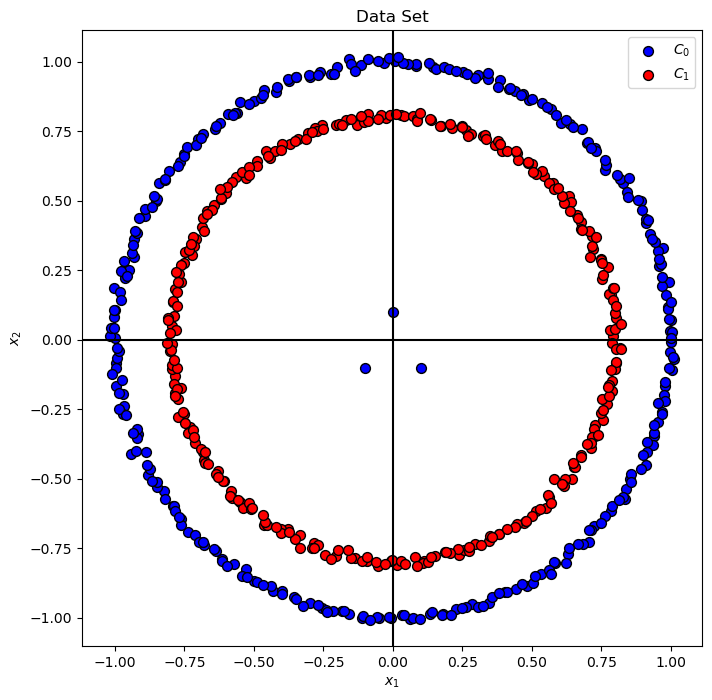

In [19]:
# Plot the Data

# Decision Boundary Plotter
PlotDecisionBoundary = PlotDecisionBoundaryClosure(numGridPts, mX[:, 0].min(), mX[:, 0].max(), mX[:, 1].min(), mX[:, 1].max())

hA = PlotBinaryClassData(mX, vY, axisTitle = 'Data Set')
hA.set_xlabel('${x}_{1}$')
hA.set_ylabel('${x}_{2}$')

plt.show()

## Train a Decision Tree Classifier

Decision trains can easily, with enough degrees of freedom, can easily overfit to data (Represent any data).  
Hence tweaking their _hyper parameters_ is crucial.  

The decision tree is implemented in the [`DecisionTreeClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) class.

* <font color='brown'>(**#**)</font> The SciKit Learn default for a Decision Tree tend to overfit data.
* <font color='brown'>(**#**)</font> The `max_depth` parameter and `max_leaf_nodes` parameter are usually used exclusively.
* <font color='brown'>(**#**)</font> We can learn about the data by the orientation of the tree (How balanced it is). 
* <font color='brown'>(**#**)</font> Decision Trees are usually used in the context of ensemble (Random Forests / Boosted Trees).

In [20]:
# Plotting Function

def PlotDecisionTree( splitCriteria, numLeaf, mX: np.ndarray, vY: np.ndarray ):
    
    # Train the classifier
    oTreeCls = DecisionTreeClassifier(criterion = splitCriteria, max_leaf_nodes = numLeaf, random_state = 0)
    oTreeCls = oTreeCls.fit(mX, vY)
    clsScore = oTreeCls.score(mX, vY)
    
    hF, hA = plt.subplots(1, 2, figsize = (16, 8))
    hA = hA.flat
    
    # Decision Boundary
    hA[0] = PlotDecisionBoundary(oTreeCls.predict, hA = hA[0])
    hA[0] = PlotBinaryClassData(mX, vY, hA = hA[0], axisTitle = f'Classifier Decision Boundary, Accuracy = {clsScore:0.2%}')
    hA[0].set_xlabel('${x}_{1}$')
    hA[0].set_ylabel('${x}_{2}$')

    # Plot the Tree
    plot_tree(oTreeCls, filled = True, ax = hA[1], rounded = True)
    hA[1].set_title(f'Max Leaf Nodes = {numLeaf}')

In [21]:
# Plotting Wrapper
hPlotDecisionTree = lambda splitCriteria, numLeaf: PlotDecisionTree(splitCriteria, numLeaf, mX, vY)

In [22]:
# Display the Geometry of the Classifier

splitCriteriaDropdown   = Dropdown(options = ['gini', 'entropy', 'log_loss'], value = 'gini', description = 'Split Criteria')
numLeafSlider           = IntSlider(min = 2, max = 20, step = 1, value = 2, layout = Layout(width = '30%'))
interact(hPlotDecisionTree, splitCriteria = splitCriteriaDropdown, numLeaf = numLeafSlider)

plt.show()

interactive(children=(Dropdown(description='Split Criteria', options=('gini', 'entropy', 'log_loss'), value='g…

* <font color='red'>(**?**)</font> Given `K` leaves, how many splits are there?

## Train & Test Error as a Function of the Degrees of Freedom (DoF) of the Model

The DoF of the _decision tree_ model is determined by the number of leaves.  
In this section we'll show how the number of leaves effects the performance on the train and test sets.

* <font color='red'>(**?**)</font> What kind of behavior of the error of the **train set** as a function of the number of splits is expected?
* <font color='red'>(**?**)</font> What kind of behavior of the error of the **test set** as a function of the number of splits is expected?

In [23]:
# Generate Data

mXX, vYY = make_classification(n_samples = numSamples, n_features = numFeatures, 
                               n_informative = numInformative, n_redundant = numRedundant, 
                               n_repeated = numRepeated, n_classes = numClasses, flip_y = flipRatio)

print(f'The features data shape: {mXX.shape}')
print(f'The labels data shape: {vYY.shape}')

# Decision Boundary Plotter
PlotDecisionBoundaryXX = PlotDecisionBoundaryClosure(numGridPts, mXX[:, 0].min(), mXX[:, 0].max(), mXX[:, 1].min(), mXX[:, 1].max())

The features data shape: (600, 2)
The labels data shape: (600,)


In [24]:
# Train Test Split

mXTrain, mXTest, vYTrain, vYTest = train_test_split(mXX, vYY, test_size = testRatio, shuffle = True, stratify = vYY)

In [25]:
# Train a Tree

lDecTree  = [DecisionTreeClassifier(max_leaf_nodes = kk, random_state = 0).fit(mXTrain, vYTrain) for kk in range(2, 61)]
vTrainErr = np.array([(1 - oTreeCls.score(mXTrain, vYTrain)) for oTreeCls in lDecTree])
vTestErr  = np.array([(1 - oTreeCls.score(mXTest, vYTest)) for oTreeCls in lDecTree])

In [26]:
# Plotting Function

def PlotDecisionTreeTestTrain( numLeaf, lDecTree, vTrainErr, vTestErr, mXTrain: np.ndarray, vYTrain: np.ndarray, mXTest: np.ndarray, vYTest: np.ndarray ):
    
    numSplits = numLeaf - 1
    
    # The classifier
    oTreeCls = lDecTree[numLeaf - 2]
    
    hF, hA = plt.subplots(1, 3, figsize = (16, 8))
    hA = hA.flat
    
    # Decision Boundary - Train
    hA[0] = PlotDecisionBoundaryXX(oTreeCls.predict, hA = hA[0])
    hA[0] = PlotBinaryClassData(mXTrain, vYTrain, hA = hA[0], axisTitle = f'Train Set, Error Rate = {vTrainErr[numLeaf - 2]:0.2%}')
    hA[0].set_xlabel('${x}_{1}$')
    hA[0].set_ylabel('${x}_{2}$')

    # Decision Boundary - Test
    hA[1] = PlotDecisionBoundaryXX(oTreeCls.predict, hA = hA[1])
    hA[1] = PlotBinaryClassData(mXTest, vYTest, hA = hA[1], axisTitle = f'Test Set, Error Rate = {vTestErr[numLeaf - 2]:0.2%}')
    hA[1].set_xlabel('${x}_{1}$')
    hA[1].set_ylabel('${x}_{2}$')

    # Plot the Error
    yMax = 1.1 * max(vTrainErr.max(), vTestErr.max())
    yMin = 0.9 * min(vTrainErr.min(), vTestErr.min())
    hA[2].plot(range(1, numLeaf), vTrainErr[:numSplits], color = 'm', lw = 2, marker = '.', markersize = 20, label = 'Train Error')
    hA[2].plot(range(1, numLeaf), vTestErr[:numSplits], color = 'k', lw = 2, marker = '.', markersize = 20, label = 'Test Error' )
    hA[2].set_ylim((yMin, yMax))
    hA[2].set_title(f'Max Splits = {numSplits}')
    hA[2].set_xlabel('Number of Leaves')
    hA[2].set_ylabel('Error Rate')
    hA[2].legend()

In [27]:
# Plotting Wrapper
hPlotDecisionTreeTestTrain = lambda numLeaf: PlotDecisionTreeTestTrain(numLeaf, lDecTree, vTrainErr, vTestErr, mXTrain, vYTrain, mXTest, vYTest)

In [28]:
# Display the Geometry of the Classifier

numLeafSlider = IntSlider(min = 2, max = len(lDecTree) + 1, step = 1, value = 2, layout = Layout(width = '30%'))
interact(hPlotDecisionTreeTestTrain, numLeaf = numLeafSlider)

plt.show()

interactive(children=(IntSlider(value=2, description='numLeaf', layout=Layout(width='30%'), max=60, min=2), Ou…

* <font color='red'>(**?**)</font> What are the boundaries of the _under fit_, _fit_ and _over fit_ of the model as a function of the number of splits?